In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('df.csv', index_col= 0)

In [7]:
df.sample(5)

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
359201,847609,Canada,New Brunswick,Fredericton,E3B 2H2,Female,Bachelor,59149.00,Married,Star,7855.32,Standard,2013,10,9999,0,2018,6,11,5,16,2080,208.0,0,0
123314,936088,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,54297.00,Married,Star,4198.03,2018 Promotion,2018,2,9999,0,2017,3,3,0,3,3468,346.0,0,0
109255,710598,Canada,British Columbia,Vancouver,V6E 3D9,Male,Bachelor,50884.00,Single,Star,6293.96,2018 Promotion,2018,2,9999,0,2017,8,0,0,0,0,0.0,0,0
237440,703804,Canada,Quebec,Quebec City,G1B 3L5,Male,College,66731.38,Married,Nova,35692.17,Standard,2012,6,9999,0,2017,10,11,0,11,3058,305.0,0,0
390814,935570,Canada,British Columbia,Vancouver,V5R 1W3,Female,Bachelor,75414.00,Married,Star,15031.56,Standard,2016,8,9999,0,2018,11,0,0,0,0,0.0,0,0


### ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [17]:
df_reservas_mensuales = df.groupby('month')['flights_booked'].sum().reset_index()

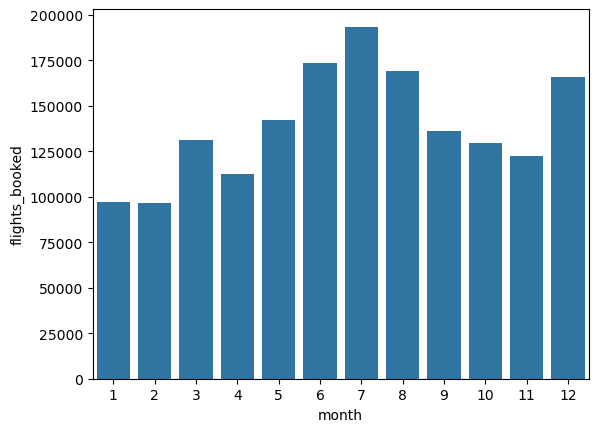

In [25]:
sns.barplot(
    data=df_reservas_mensuales,
    x='month',
    y='flights_booked');

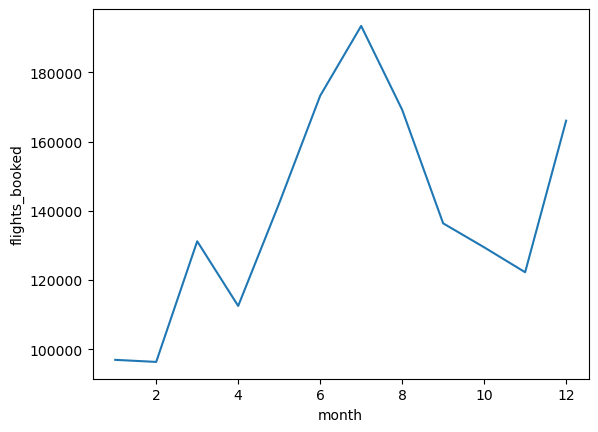

In [26]:
sns.lineplot(
    data=df_reservas_mensuales,
    x='month',
    y='flights_booked'
);

Vemos que hay una subida significativa de reservas entre abril y julio. A partir de este mes bajan, para luego volver a subir entre noviembre y diciembre, seguramente por fechas navideñas

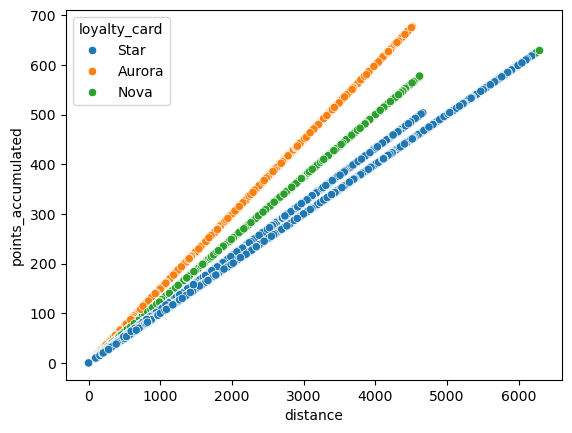

In [28]:
sns.scatterplot(
    data=df,
    x='distance',
    y='points_accumulated',
    hue= 'loyalty_card');

vemos que claramente hay una relación clara entre la distancia volada y los puntos acumulados, siendo que cuantas mas millas/km se recorren, más puntos se acumulan. Las distintas líneas que vemos se deben a que la compañia utiliza distintos niveles de membresía, porque, si se tiene un nivel de membresía mas bajo, aunque se vuele más, los puntos van a ser menos que los de alguien con un nivel de membresía mas alto

### ¿Cuál es la distribución de los clientes por provincia o estado?

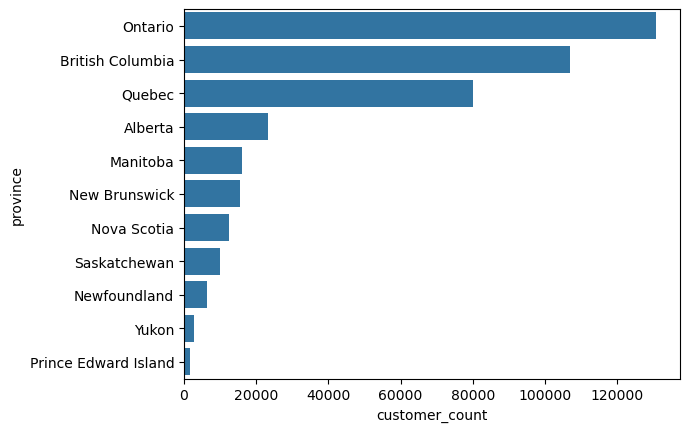

In [30]:
df_distribucion = df['province'].value_counts().reset_index() # .value_counts() cuenta la frecuencia y .reset_index() la prepara para Seaborn
df_distribucion.columns = ['province', 'customer_count'] # Nombrar las columnas

sns.barplot(
    data=df_distribucion,
    x='customer_count', 
    y='province');


Aqui vemos que el mayor numero de clientes se encuentran en Ontario, mientras que el menor se encuentra en PrinceEdward Island.

### ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [ ]:
education = ['High School or Below', 'College', 'Bachelor', 'Master', 'Doctor'] #definimos las columnas que tienen que aparecer

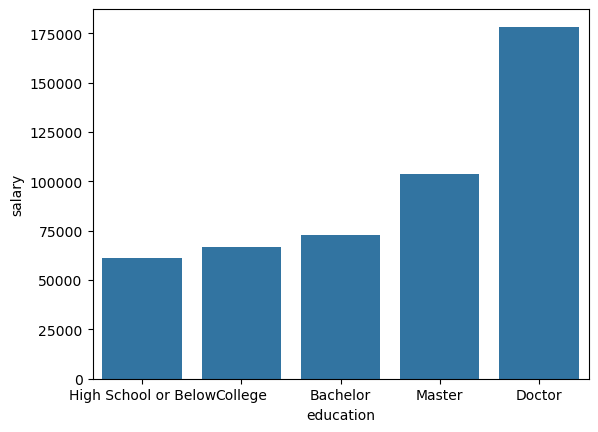

In [35]:
# Calcular el salario promedio por educación
df_salario_promedio = df.groupby('education')['salary'].mean().reindex(education).reset_index()

sns.barplot(
    data=df_salario_promedio,
    x='education',
    y='salary');

hay una clara relación entre el nivel educativo y el salario. Cuanto mayor es este, mayor es el sueldo

### ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [40]:
df_cont_tarjetas = df.groupby("loyalty_card")["loyalty_number"].count().reset_index()
df_cont_tarjetas

,loyalty_card,loyalty_number
0,Aurora,83832
1,Nova,137568
2,Star,184224


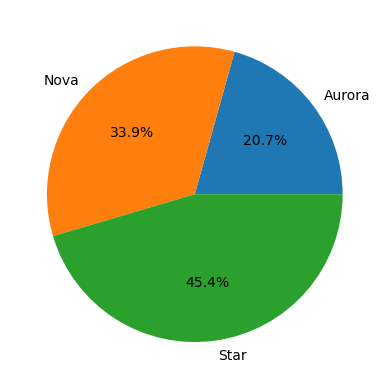

In [42]:
plt.pie("loyalty_number", labels= "loyalty_card",
        data = df_cont_tarjetas, 
        autopct=  '%1.1f%%');

la mayor parte de las tarjetas son del tipo Star. No hay una diferencia extrema entre los tipo de tarjetas

### ¿Cómo se distribuyen los clientes según su estado civil y género?

In [44]:
#agrupamos para ver la frecuencia de las dos columnas
df_mar_gen = df.groupby(['marital_status', 'gender']).size().reset_index(name='Customer_Count')


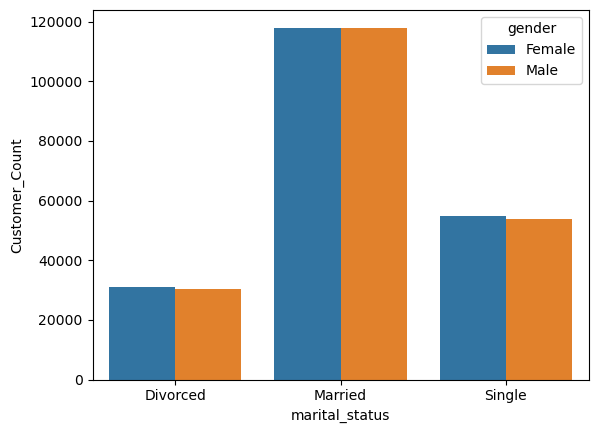

In [45]:
sns.barplot(
    data = df_mar_gen,
    x='marital_status',
    y='Customer_Count',
    hue='gender');

en genral, no hay mucha diferencia entre mujeres y hombres, sin embargo, si que se obseerva que la mayoria de los clientes estan casados.

### ¿Hay alguna relación entre los ingresos y los tipos de tarjeta de fidelidad?

por lo general, estan bastante repartidos, por lo que no se ve que haya una preferencia de categoria por nivel adquisitivo

In [40]:
# 1. Agrupar por provincia y sumar el total de vuelos reservados
df_vuelos_por_provincia = df.groupby('province')['flights booked'].sum().reset_index()

# 2. Renombrar y ordenar de mayor a menor tendencia a viajar
df_vuelos_por_provincia.columns = ['Province', 'Total_Flights_Booked']

df_vuelos_por_provincia = df_vuelos_por_provincia.sort_values(
    by='Total_Flights_Booked', 
    ascending=False
)

C:\Users\maria\AppData\Local\Temp\ipykernel_29268\3755994510.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


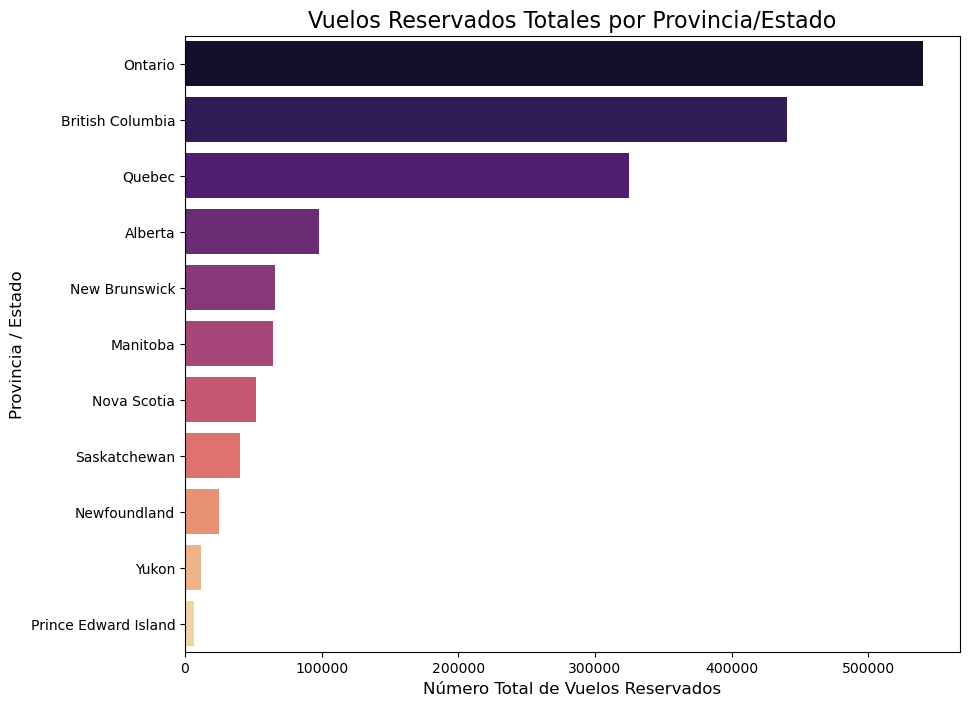

In [41]:
# Crear la figura
plt.figure(figsize=(10, 8))

# Crear el Gráfico de Barras Horizontal
sns.barplot(
    data=df_vuelos_por_provincia,
    x='Total_Flights_Booked',
    y='Province',
    palette='magma', # Una nueva paleta de colores
    order=df_vuelos_por_provincia['Province'] # Asegura el orden descendente
)

# Añadir etiquetas y título
plt.title('Vuelos Reservados Totales por Provincia/Estado', fontsize=16)
plt.xlabel('Número Total de Vuelos Reservados', fontsize=12)
plt.ylabel('Provincia / Estado', fontsize=12)

# Mostrar el gráfico
plt.show()

Ontario sigue siendo la Provincia que mas vuelos reserva

In [42]:
# 1. Agrupar por provincia y sumar la distancia total volada
df_distancia_por_provincia = df.groupby('province')['distance'].sum().reset_index()

# 2. Renombrar y ordenar de mayor a menor distancia
df_distancia_por_provincia.columns = ['Province', 'Total_Distance_Flown']

df_distancia_por_provincia = df_distancia_por_provincia.sort_values(
    by='Total_Distance_Flown', 
    ascending=False
)

C:\Users\maria\AppData\Local\Temp\ipykernel_29268\22983393.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


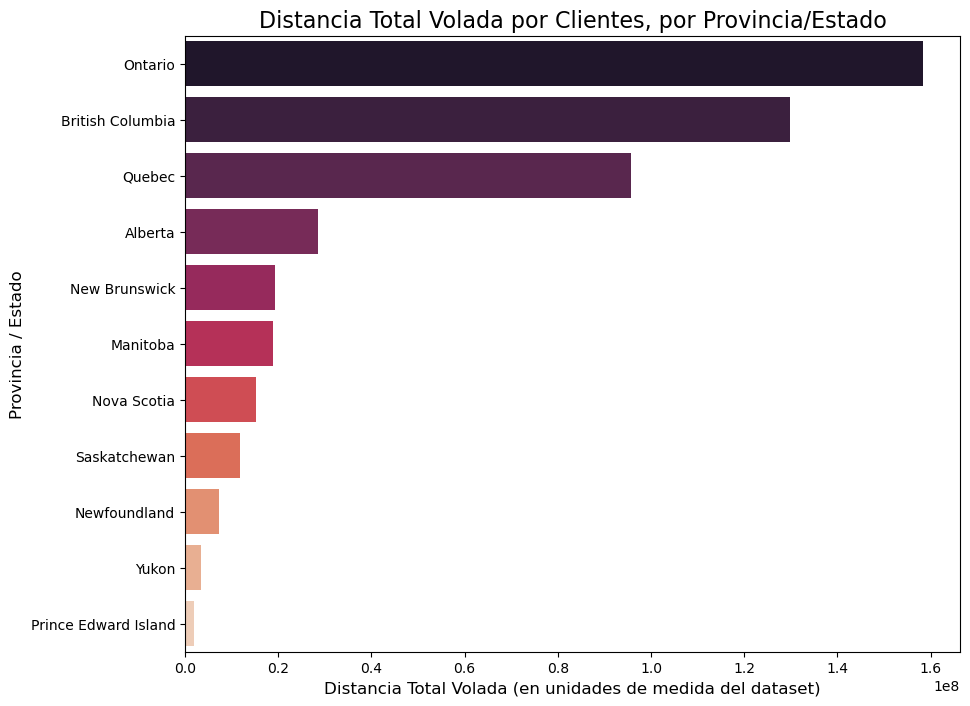

In [43]:
# Crear la figura
plt.figure(figsize=(10, 8))

# Crear el Gráfico de Barras Horizontal
sns.barplot(
    data=df_distancia_por_provincia,
    x='Total_Distance_Flown',
    y='Province',
    palette='rocket', # Una nueva paleta de colores
    order=df_distancia_por_provincia['Province'] # Asegura el orden descendente
)

# Añadir etiquetas y título
plt.title('Distancia Total Volada por Clientes, por Provincia/Estado', fontsize=16)
plt.xlabel('Distancia Total Volada (en unidades de medida del dataset)', fontsize=12)
plt.ylabel('Provincia / Estado', fontsize=12)

# Mostrar el gráfico
plt.show()

por lo que vemos, en terminos generales, los de ontario son lo mas todo

In [51]:
# Columnas de interés: Identificador de cliente, mes, y la métrica acumulada
columnas_seleccionadas = ['loyalty number', 'month', 'total flights']

# Agrupar por Cliente y Mes, y seleccionar la columna 'total flights'.
# Usamos first() o max() ya que el valor de 'total flights' debe ser el mismo 
# dentro de cada grupo (Cliente, Mes).
df_vuelos_acumulados_mensuales = df.groupby(['Loyalty Number', 'month'])[
    'total flights'
].first().reset_index()

# Opcional: Ordenar por cliente y luego por mes para facilitar la lectura de la serie temporal
df_vuelos_acumulados_mensuales = df_vuelos_acumulados_mensuales.sort_values(
    by=['Loyalty Number', 'month']
)

print("✅ DataFrame creado con el total de vuelos acumulados por cliente y mes.")
print("\nEjemplo de Evolución del Vuelo Acumulado para los primeros clientes:")
print(df_vuelos_acumulados_mensuales.head(10))

✅ DataFrame creado con el total de vuelos acumulados por cliente y mes.

Ejemplo de Evolución del Vuelo Acumulado para los primeros clientes:
   Loyalty Number  month  total flights
0          100018      1              3
1          100018      2              4
2          100018      3             17
3          100018      4              4
4          100018      5              0
5          100018      6              5
6          100018      7             10
7          100018      8             15
8          100018      9             13
9          100018     10             10
